In [64]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy.ma as ma
from matplotlib.colors import ListedColormap
import xarray as xr

In [65]:
file_dir = 'C:/Users/taiwoajayi/Documents/Imergnew/Imerg/'
files_2020 = sorted(glob.glob( file_dir + '**IMERG*S000000**.nc4'))

In [66]:
IMERG = []
for i in range(0,len(files_2020)):
    IMERG.append(xr.open_dataset(files_2020[i]))

In [67]:
i=1

In [84]:
lon = IMERG[i].variables['lon'][:]
lat = IMERG[i].variables['lat'][:]
pre = IMERG[i].variables['precipitation'][:].squeeze('time')

In [109]:
pre

<xarray.Variable (lat: 521, lon: 929)>
[484009 values with dtype=float32]
Attributes:
    units:         mm/day
    long_name:     Daily mean precipitation rate (combined microwave-IR) esti...
    origname:      precipitation
    fullnamepath:  /precipitation

In [69]:
lat.min()

<xarray.Variable ()>
array(-0.25)

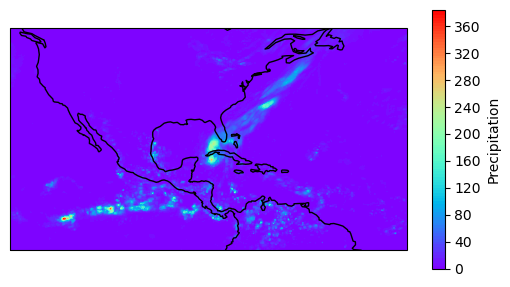

In [87]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
pre = pre.transpose('lat', 'lon')
lon_min, lon_max, lat_min, lat_max = -130.75, -37.95, -0.25, 60
lon_grid, lat_grid = np.meshgrid(lon, lat)
masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
plt.contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow')# , vmin=-.5, vmax=1.5 nipy_spectral
ax.coastlines()
cbar = plt.colorbar(shrink=0.7)
cbar.set_label('Precipitation')
plt.show()

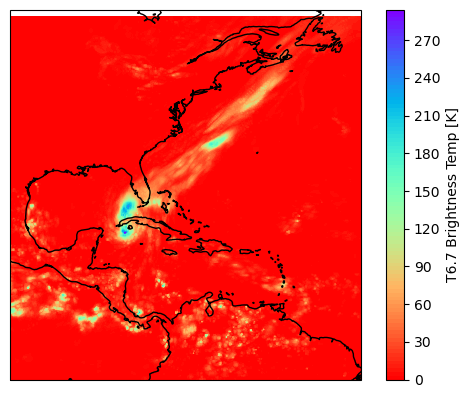

In [88]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-50, -100, 0, 50))
pre = pre.transpose('lat', 'lon')
lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
lon_grid, lat_grid = np.meshgrid(lon, lat)
masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
plt.contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow_r')# , vmin=-.5, vmax=1.5 nipy_spectral
ax.coastlines()
cbar = plt.colorbar()
cbar.set_label('T6.7 Brightness Temp [K]')
plt.show()

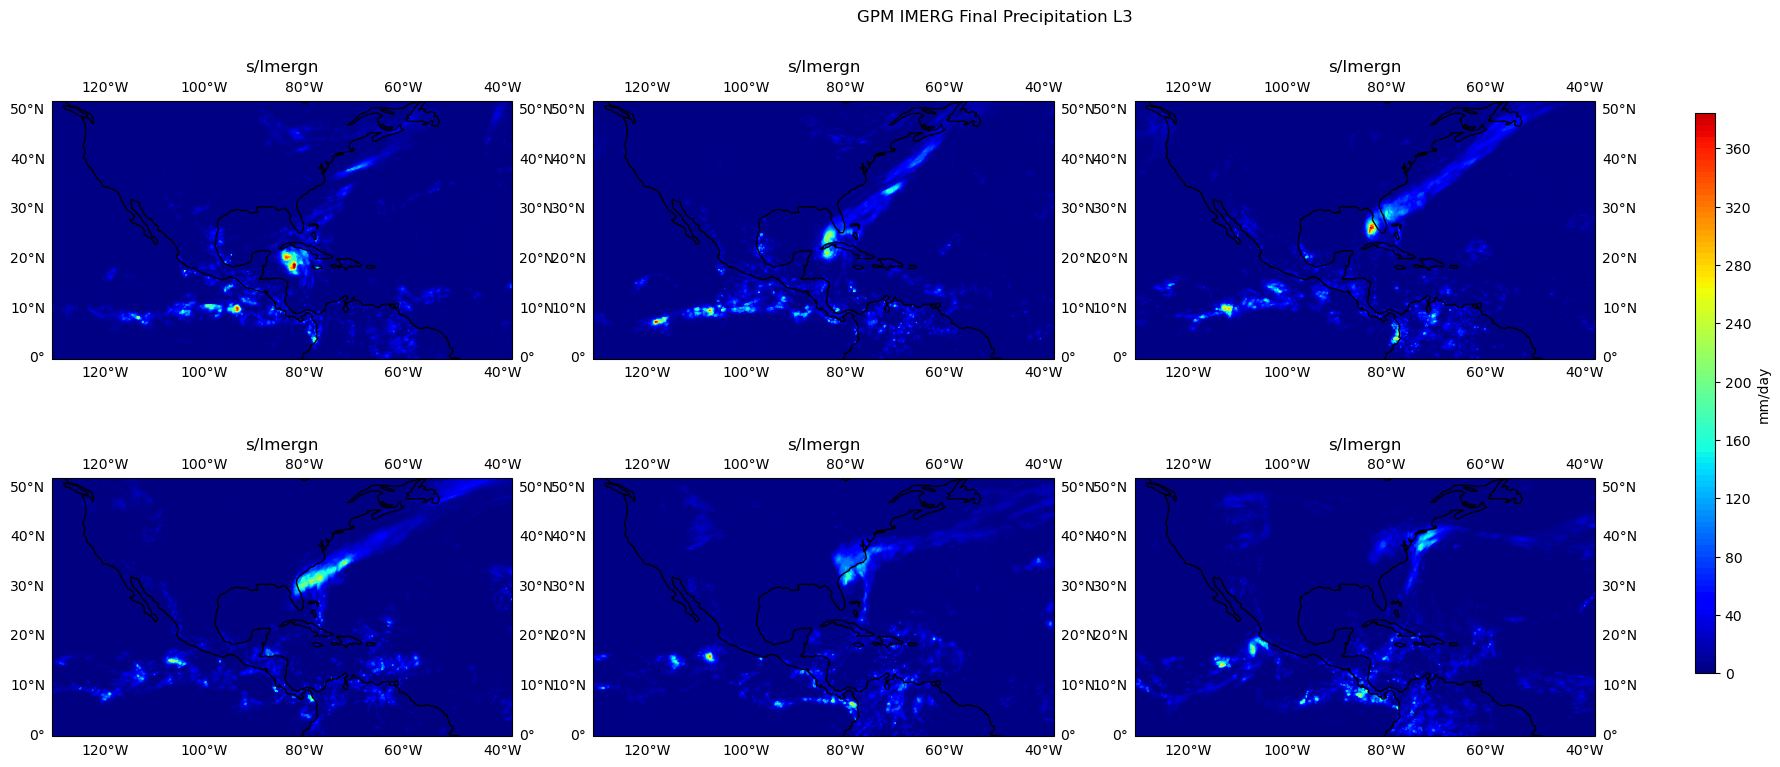

In [125]:
fig,ax = plt.subplots(2, 3, figsize=(20, 8), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(IMERG)):
    lon = IMERG[i].variables['lon'][:]
    lat = IMERG[i].variables['lat'][:]
    pre = IMERG[i].variables['precipitation'][:].squeeze('time')

    ax[x,y].set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -130.75, -37.95, -0.25, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='jet', vmin=0, vmax=410)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    contours.append(contour)
    ax[x,y].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
    ax[x,y].set_title(files_2020[i][28:36])
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1

# Show gridlines with tick values on the x and y axes
fig.suptitle('GPM IMERG Final Precipitation L3')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
plt.show()
#plt.savefig('./figures/1.png', dpi=300)

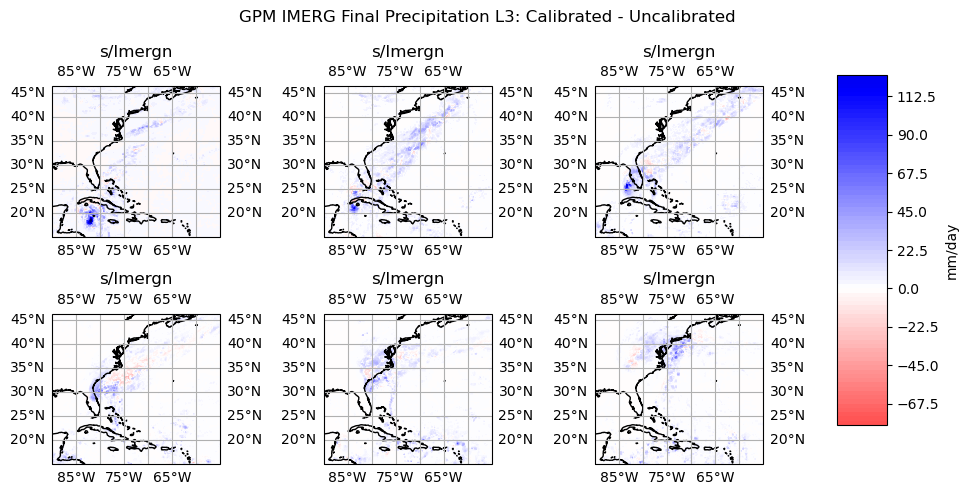

In [39]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(IMERG)):
    lon = IMERG[i].variables['lon'][:]
    lat = IMERG[i].variables['lat'][:]
    pre = IMERG[i].variables['precipitation'][:].squeeze('time') - IMERG[i].variables['MWprecipitation'][:].squeeze('time')

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='seismic_r', vmin=-230, vmax=230)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(files_2020[i][28:36])
    #fig.colorbar(contour)
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Final Precipitation L3: Calibrated - Uncalibrated')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
#plt.savefig('./figures/1.png', dpi=300)

In [129]:
# Assuming IMERG[1], IMERG[2], IMERG[3], IMERG[4], IMERG[5] are xarray datasets

# Combine the data along the 'time' dimension
combined_data = xr.concat([IMERG[0], IMERG[1], IMERG[2], IMERG[3], IMERG[4], IMERG[5]], dim="time")

# Sum the data along the 'time' dimension
summed_data = combined_data.sum(dim='time')


In [130]:
summed_data

<xarray.Dataset>
Dimensions:                         (lon: 929, lat: 521, nv: 2)
Coordinates:
  * lat                             (lat) float64 -0.25 -0.15 ... 51.65 51.75
  * lon                             (lon) float32 -130.8 -130.6 ... -37.95
  * nv                              (nv) float32 0.0 1.0
Data variables:
    MWprecipitation                 (lon, lat) float32 0.0 0.0 ... 14.42 12.08
    precipitation_cnt_cond          (lon, lat) int32 1 2 4 2 2 ... 33 33 35 40
    precipitation                   (lon, lat) float32 0.06 0.115 ... 10.79
    MWprecipitation_cnt             (lon, lat) int32 66 66 65 65 ... 113 114 114
    MWprecipitation_cnt_cond        (lon, lat) int32 0 0 1 0 0 ... 18 18 17 18
    probabilityLiquidPrecipitation  (lon, lat) int32 600 600 600 ... 598 600 600
    randomError                     (lon, lat) float32 18.27 19.78 ... 720.3
    precipitation_cnt               (lon, lat) int32 288 288 288 ... 288 288 288

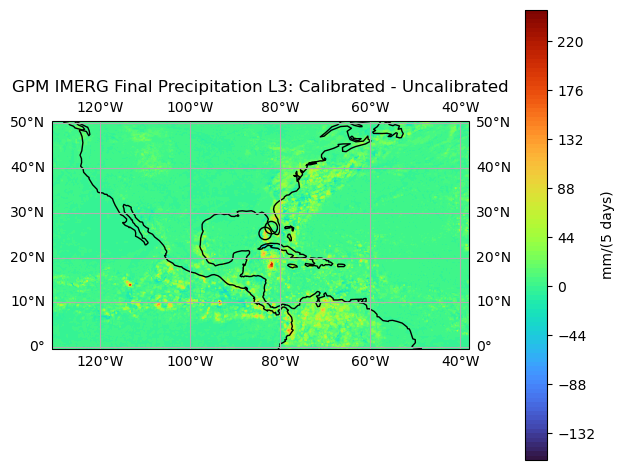

In [165]:
# Define latitude and longitude bounds
lat_min, lat_max = -0.25, 60
lon_min, lon_max = -130.75, -37.95

# Subset the dataset based on the specified bounds
summed_data = summed_data.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = summed_data.variables['lon']
lat = summed_data.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-37.95, -130.75, -0.25, 40))
summed_data = summed_data.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, summed_data['precipitation'] - summed_data['MWprecipitation'], 100, transform=ccrs.PlateCarree(), cmap='turbo')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(5 days)')
ax.gridlines(draw_labels=True)
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG Final Precipitation L3: Calibrated - Uncalibrated')
plt.tight_layout()

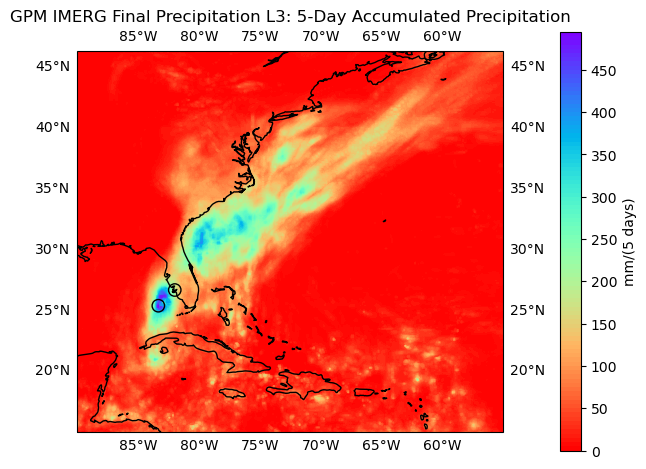

In [164]:
total = xr.concat([IMERG[1], IMERG[2], IMERG[3], IMERG[4], IMERG[5]], dim="time")
pre = total.sum(dim='time')



# Define latitude and longitude bounds
lat_min, lat_max = 10, 50
lon_min, lon_max = -90, -55

# Subset the IMERGset based on the specified bounds
pre = pre.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = pre.variables['lon']
lat = pre.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-55, -90, 15, 45))
pre = pre.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, pre['precipitation'], 100, transform=ccrs.PlateCarree(), cmap='rainbow_r')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(5 days)')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG Final Precipitation L3: 5-Day Accumulated Precipitation')
plt.tight_layout()

In [148]:
pre

<xarray.Dataset>
Dimensions:                         (lon: 350, lat: 400, nv: 2)
Coordinates:
  * lat                             (lat) float64 10.05 10.15 ... 49.85 49.95
  * lon                             (lon) float32 -89.95 -89.85 ... -55.05
  * nv                              (nv) float32 0.0 1.0
Data variables:
    MWprecipitation                 (lat, lon) float32 34.8 22.73 ... 19.04
    precipitation_cnt_cond          (lat, lon) int32 35 40 48 58 ... 66 73 70 60
    precipitation                   (lat, lon) float32 22.06 20.79 ... 27.98
    MWprecipitation_cnt             (lat, lon) int32 58 58 58 59 ... 91 92 91 92
    MWprecipitation_cnt_cond        (lat, lon) int32 13 16 17 18 ... 25 27 29 25
    probabilityLiquidPrecipitation  (lat, lon) int32 500 500 499 ... 500 498 500
    randomError                     (lat, lon) float32 2.184e+03 ... 2.696e+03
    precipitation_cnt               (lat, lon) int32 240 240 240 ... 240 240 240

In [149]:
pre[pre['precipitation'].argmax(dim=['lat', 'lon'])]

<xarray.Dataset>
Dimensions:                         (nv: 2)
Coordinates:
    lat                             float64 25.35
    lon                             float32 -83.35
  * nv                              (nv) float32 0.0 1.0
Data variables:
    MWprecipitation                 float32 442.8
    precipitation_cnt_cond          int32 152
    precipitation                   float32 494.0
    MWprecipitation_cnt             int32 66
    MWprecipitation_cnt_cond        int32 38
    probabilityLiquidPrecipitation  int32 498
    randomError                     float32 1.273e+05
    precipitation_cnt               int32 240

Now let's plot only at the city

In [151]:
total = xr.concat([IMERG[0], IMERG[1], IMERG[2], IMERG[3], IMERG[4], IMERG[5]], dim="time")
max_loc = total["precipitation"].sel(lon=-82.00, lat=26.64, method="nearest")

In [152]:
max_loc

<xarray.DataArray 'precipitation' (time: 6)>
array([  2.5349998,  60.64999  , 116.295    ,   3.8      ,   0.       ,
         0.       ], dtype=float32)
Coordinates:
    lat      float64 26.65
    lon      float32 -81.95
  * time     (time) datetime64[ns] 2022-09-26 2022-09-27 ... 2022-10-01
Attributes:
    units:         mm/day
    long_name:     Daily mean precipitation rate (combined microwave-IR) esti...
    origname:      precipitation
    fullnamepath:  /precipitation

Text(0.5, 1.0, 'Cape Coral, FL (26.64 N, 82.00 W)')

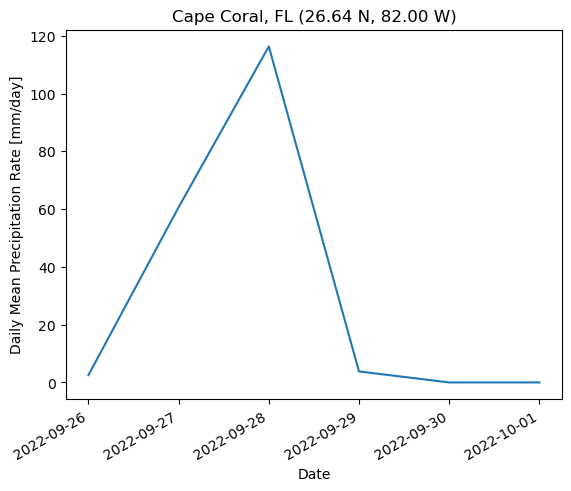

In [153]:
max_loc.plot()
plt.xlabel('Date')
plt.ylabel('Daily Mean Precipitation Rate [mm/day]')

plt.title('Cape Coral, FL (26.64 N, 82.00 W)')

In [154]:
max_loc['time'], max_loc.item

(<xarray.DataArray 'time' (time: 6)>
 array(['2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
        '2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
        '2022-09-30T00:00:00.000000000', '2022-10-01T00:00:00.000000000'],
       dtype='datetime64[ns]')
 Coordinates:
     lat      float64 26.65
     lon      float32 -81.95
   * time     (time) datetime64[ns] 2022-09-26 2022-09-27 ... 2022-10-01
 Attributes:
     standard_name:  time
     long_name:      time
     bounds:         time_bnds
     origname:       time
     fullnamepath:   /time,
 <bound method _values_method_wrapper.<locals>.func of <xarray.DataArray 'precipitation' (time: 6)>
 array([  2.5349998,  60.64999  , 116.295    ,   3.8      ,   0.       ,
          0.       ], dtype=float32)
 Coordinates:
     lat      float64 26.65
     lon      float32 -81.95
   * time     (time) datetime64[ns] 2022-09-26 2022-09-27 ... 2022-10-01
 Attributes:
     units:         mm/day
     long_name:     D

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

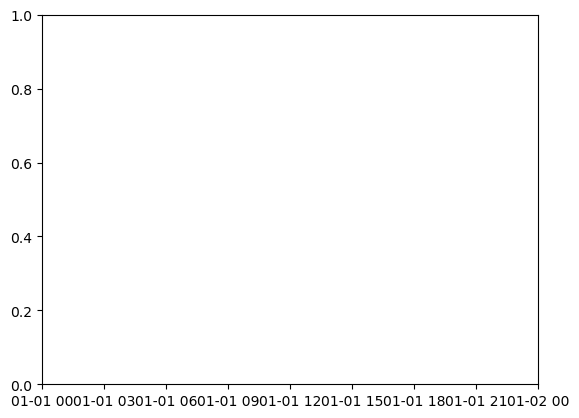

In [158]:
plt.plot(max_loc['time'], max_loc.item)

In [ ]:
data_paths_ir = sorted(glob.glob('./data_ir/*'))
data_ir = []
for i in range(0,len(data_paths_ir)):
    data_ir.append(xr.open_dataset(data_paths_ir[i]))

In [ ]:
data_ir[1].variables['h2o_vap_tot'][:][1,:,:]

<xarray.Variable (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Attributes:
    units:                  kg / m2
    ancillary_variables:    h2o_vap_tot_nobs h2o_vap_tot_sdev
    long_name:              total water vapor
    standard_name:          atmosphere_mass_content_of_water_vapor
    description:            total precipitable water vapor
    AIRS_HDF_name:          totH2OVap
    cell_methods:           area: mean
    coverage_content_type:  physicalMeasurement

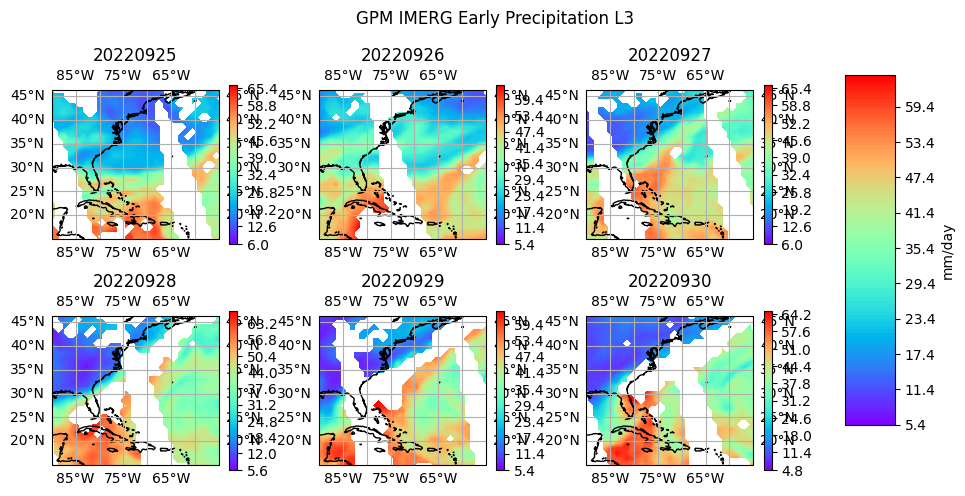

In [ ]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(data_ir)):
    lon = data_ir[i].variables['lon'][:]
    lat = data_ir[i].variables['lat'][:]
    pre = data_ir[i].variables['h2o_vap_tot'][:][0,:,:]

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow')#, vmin=0, vmax=410)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    fig.colorbar(contour)
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(data_paths[i][28:36])
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Early Precipitation L3')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
plt.savefig('./figures/1.png', dpi=300)

Early data

In [ ]:
data_paths_uncal = sorted(glob.glob('./data_late/*'))
data_uncal = []
for i in range(0,len(data_paths_uncal)):
    data_uncal.append(xr.open_dataset(data_paths_uncal[i]))

In [ ]:
data_uncal[0]

<xarray.Dataset>
Dimensions:                    (time: 1, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                        (lon) float32 -179.9 -179.8 ... 179.9 179.9
  * lat                        (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * time                       (time) object 2022-09-25 00:00:00
Dimensions without coordinates: nv
Data variables:
    precipitationCal           (time, lon, lat) float32 ...
    precipitationCal_cnt       (time, lon, lat) int8 ...
    precipitationCal_cnt_cond  (time, lon, lat) int8 ...
    HQprecipitation            (time, lon, lat) float32 ...
    HQprecipitation_cnt        (time, lon, lat) int8 ...
    HQprecipitation_cnt_cond   (time, lon, lat) int8 ...
    randomError                (time, lon, lat) float32 ...
    randomError_cnt            (time, lon, lat) int8 ...
    time_bnds                  (time, nv) object ...
Attributes:
    BeginDate:       2022-09-25
    BeginTime:       00:00:00.000Z
    EndDate:         2022-09-25
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2022-09-25T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20220925-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2022-09-26T14:45:27.458Z

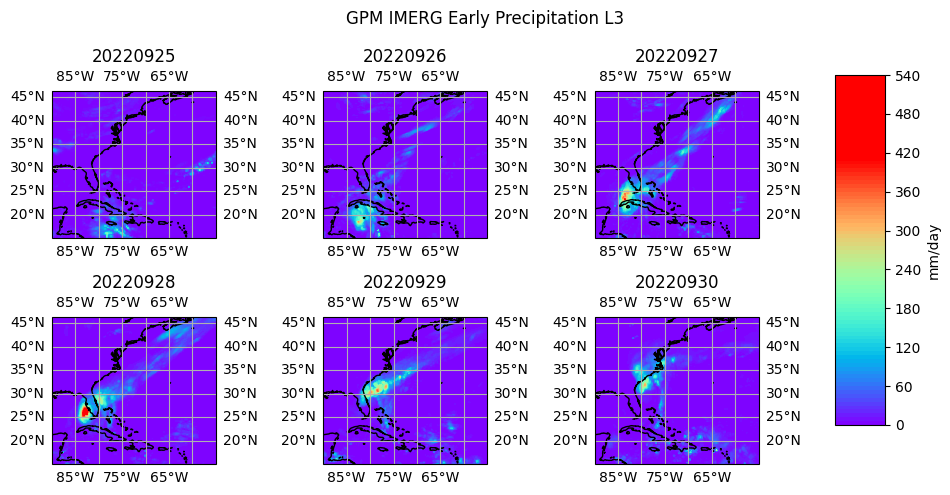

In [ ]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(data_uncal)):
    lon = data_uncal[i].variables['lon'][:]
    lat = data_uncal[i].variables['lat'][:]
    pre = data_uncal[i].variables['precipitationCal'][:].squeeze('time')

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow', vmin=0, vmax=410)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(data_paths[i][28:36])
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Early Precipitation L3')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
plt.savefig('./figures/1.png', dpi=300)

In [ ]:
data[0]

<xarray.Dataset>
Dimensions:                         (time: 1, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float64 -89.95 -89.85 ... 89.85 89.95
  * time                            (time) datetime64[ns] 2022-09-25
Dimensions without coordinates: nv
Data variables:
    precipitation                   (time, lon, lat) float32 ...
    precipitation_cnt               (time, lon, lat) int8 ...
    precipitation_cnt_cond          (time, lon, lat) int8 ...
    MWprecipitation                 (time, lon, lat) float32 ...
    MWprecipitation_cnt             (time, lon, lat) int8 ...
    MWprecipitation_cnt_cond        (time, lon, lat) int8 ...
    randomError                     (time, lon, lat) float32 ...
    randomError_cnt                 (time, lon, lat) int8 ...
    probabilityLiquidPrecipitation  (time, lon, lat) int8 ...
    time_bnds                       (time, nv) datetime64[ns] ...
Attributes:
    BeginDate:       2022-09-25
    BeginTime:       00:00:00.000Z
    EndDate:         2022-09-25
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2022-09-25T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR.MS.MRG.3IMERG.20220925-S000000-E002959.0000.V07A....
    title:           GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 ...
    DOI:             10.5067/GPM/IMERGDF/DAY/07
    ProductionTime:  2023-08-23T18:51:35.565Z